# Predicción del voto

#### En este trabajo utilizaré dos encuestas de intención de voto realizadas en enero y marzo de 2018 en AMBA. <br>Utilizaré la primera como mi train set ya la segunda como test.<br> La intención es tomar el campo de intención de voto a uno de los partidos políticos (en este caso tomamos a cambiemos arbitrariamente) como campo a predecir en base a las demás preguntas.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
#matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_columns', 500)
train_df = pd.read_csv('BASE_AMBA_enero2018.csv')
train_df.shape

(1372, 47)

In [3]:
train_df.head()

,%date%,%cid%,Genero,Edad,Estudios,Como cree Ud. que es la gestión del gobierno nacional encabezada por Mauricio Macri?,Y como cree Ud. que es la gestión del gobierno provincial encabezada por María Eugenia Vidal?,Y como cree Ud. que es la gestión del intendente de su municipio?,Qué imagen tiene usted de Mauricio Macri?,Y qué imagen tiene Ud. de Cristina Fernández de Kirchner?,Y qué imagen tiene Ud. de María Eugenia Vidal?,Y qué imagen tiene Ud. de Sergio Massa?,Y qué imagen tiene Ud. de Elisa Carrió?,Y qué imagen tiene Ud. de Marcos Peña?,¿A qué espacio político diría usted que se siente más cercano?,"13. ¿Cuan probable es para usted votar a presidente por Mauricio Macri, Maria Eugenia Vidal o un candidato que ellos apoyen? Usted diría que…",¿Y cuan probable es para usted votar a presidente por Cristina Fernández de Kirchner o un candidato que ella apoye? Usted diría que…,¿Y cuan probable es para usted votar a presidente por Sergio Massa o un candidato que él apoye? Usted diría que…,¿Y cuan probable es para usted votar a presidente a un candidato del Peronismo? Usted diría que…,¿Cuál de los siguientes estados de ánimo le despierta hoy a Ud. la situación del país?,¿Cuál de los siguientes estados de ánimo le despierta hoy a Ud. la situación de su municipio?,Según su opinión cómo es la situación económica hoy en el país?,y como es su situación económica personal?,Teniendo en cuenta sus gastos habituales. ¿Cuánto cree Ud. que comprara en supermercado en los próximos meses?,Y ¿Cuánto cree Ud. que comprara en indumentaria en los próximos meses?,Y ¿Cuánto cree Ud. Consumirá en Salidas y Ocio en los próximos meses?,"Y en relación a los Viajes y escapadas, considera que en los próximos meses…",¿Cree que la inflación al día de hoy es…,Y en los próximos tres meses usted cree que la inflación,¿Cree que las posibilidades de perder su empleo en los próximos tres meses son…,Respecto a sus tarjetas de crédito y/o préstamos bancarios. ¿Qué tan endeudado se siente Ud.?,"Cambiando de tema, podría decirnos cuál es su condición de actividad? Es decir, cuál es su principal actividad?","Cambiando de tema, ¿cuál considera usted que es la principal problemática de la actualidad entre las siguientes opciones?",¿Y cuál considera usted que es la principal problemática de su ciudad de entre las siguientes opciones?,Cantidad,ProvMunLoc,RadioCensal,NSE,FC,ProvMunFC,Localidad,ProvMun,PorvLoc,ProvMunFC_A,SE,Zona,PonderFinal8
0,19-Jan-2018,541146682815,Feme,60-74,HSC,Buena,Buena,Regular positiva,Buena,Muy Mala,Buena,Buena,Buena,Buena,A cambiemos,Es probable que la vote,Nunca lo votaría,No sabe,Es poco probable que lo vote,Esperanza,Esperanza,Regular positiva,Buena,Compraré lo mismo que antes,No sabe,Consumiré lo mismo que antes,Viajaré igual que antes,Media,No Sabe,No Sabe,Nada endeudado,Soy jubilado o pensionado,Corrupción,Falta de cloacas,1,BUENOS AIRES SAN MIGUEL ...,06.760.13.03,C2,06.760.13,BUENOS AIRES SAN MIGUEL ...,BELLA VISTA,BUENOS AIRES SAN MIGUEL,SAN MIGUEL,BUENOS AIRES SAN MIGUEL ...,1era SE,2do Cordon,"1,393"
1,19-Jan-2018,541142635685,Feme,16-29,TUoS,Regular positiva,Regular positiva,Regular negativa,No sabe,No sabe,No sabe,No sabe,No sabe,No sabe,Al radicalismo,No sabe,Es poco probable que lo vote,No sabe,No sabe,Esperanza,Preocupación,Regular positiva,Regular positiva,No sabe,No sabe,No sabe,No sabe,Media,No Sabe,No Sabe,Nada endeudado,Soy desocupado,NaN,NaN,1,BUENOS AIRES ESTEBAN ECHEVERRIA ...,06.260.16.06,C3,06.260.16,BUENOS AIRES ESTEBAN ECHEVERRIA ...,MONTE GRANDE,BUENOS AIRES ESTEBAN ECHEVERRIA,ESTEBAN ECHEVERRIA,BUENOS AIRES ESTEBAN ECHEVERRIA ...,3era SE,2do Cordon,"0,5361"
2,19-Jan-2018,541148233063,Masc,75 o mas,TUoS,Buena,No sabe,Buena,Muy buena,Muy Mala,Muy buena,Regular positiva,Buena,Buena,Al radicalismo,Muy probable que la vote,Nunca lo votaría,Nunca lo votaría,Nunca lo votaría,No sabe,Esperanza,Regular positiva,Regular positiva,Compraré lo mismo que antes,Compraré lo mismo que antes,Consumiré lo mismo que antes,Viajaré igual q

In [46]:
test_df = pd.read_csv('BASE_AMBA_NORM_enero2018.csv')
train_df = pd.read_csv('BASE_AMBA_NORM_marzo2018.csv')

Chequeo que tan completos están los datos

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 40 columns):
%date%                               1372 non-null object
%cid%                                1372 non-null int64
Genero                               1372 non-null object
Edad                                 1372 non-null object
Estudios                             1372 non-null object
gobierno_macri                       1302 non-null object
gobierno_vidal                       1275 non-null object
gobierno_intendente                  1259 non-null object
imagen_macri                         1178 non-null object
imagen_cfk                           1165 non-null object
imagen_vidal                         1152 non-null object
imagen_massa                         1138 non-null object
imagen_carrio                        1124 non-null object
partido_politico                     1077 non-null object
voto_cambiemos                       1051 non-null object
voto_cfk                

In [47]:
train_df.dropna(subset=['principal_problematica_actualidad'], inplace=True)
train_df.dropna(subset=['voto_cambiemos'], inplace=True)
test_df.dropna(subset=['principal_problematica_actualidad'], inplace=True)
test_df.dropna(subset=['voto_cambiemos'], inplace=True)
train_df.shape

(769, 40)

In [52]:
np.unique(train_df['voto_cambiemos'].values)

array(['Es poco probable que lo vote', 'Es probable que la vote',
       'Muy probable que la vote', 'No sabe', 'Nunca lo votar\xc3\xada'],
      dtype=object)

In [7]:
train_df.describe(include=['O'])

,%date%,Genero,Edad,Estudios,gobierno_macri,gobierno_vidal,gobierno_intendente,imagen_macri,imagen_cfk,imagen_vidal,imagen_massa,imagen_carrio,partido_politico,voto_cambiemos,voto_cfk,voto_massa,voto_peronismo,emocion_pais,emocion_municipio,economia_pais,economia_personal,inflacion,inflacion_futuro,posibilidad_perdida_empleo,actividad_personal,principal_problematica_actualidad,principal_problematica_ciudad,ProvMunLoc,RadioCensal,NSE,FC,ProvMunFC,Localidad,ProvMun,PorvLoc,ProvMunFC_A,SE,zona,PonderFinal8
count,594,594,594,594,592,593,594,594,593,593,593,593,594,593,593,593,594,593,593,594,593,593,594,593,594,594,548,594,594,594,594,594,594,594,594,594,594,594,594
unique,3,2,5,3,7,7,7,7,7,7,7,7,9,5,5,5,5,7,7,7,7,4,4,6,9,9,9,160,509,5,408,430,160,39,25,430,3,3,563
top,20-Jan-2018,Feme,45-59,TUoS,Muy Mala,Muy buena,Buena,Muy buena,Muy Mala,Muy buena,Regular positiva,Muy Mala,A ningún espacio político,Nunca lo votaría,Nunca lo votaría,Nunca lo votaría,Nunca lo votaría,Preocupación,Preocupación,Regular positiva,Regular positiva,Alta,Aumentará,Ninguna,Soy jubilado o pensionado,Corrupción,Estado del hospital y centros de salud,CAPITAL FEDERAL CAPITAL FEDERAL ...,?,C2,?,BUENOS AIRES GENERAL SAN MARTIN ...,PALERMO,BUENOS AIRES LA MATANZA,CAPITAL FEDERAL,BUENOS AIRES GENERAL SAN MARTIN ...,3era SE,2do Cordon,"0,0224"
freq,249,305,195,265,139,189,136,141,203,226,172,152,251,191,328,249,194,223,180,206,229,375,284,116,204,125,116,15,70,197,70,12,15,70,135,12,235,250,4


Casteo los strings a integer, con criterios semanticos ordenados lo mas posible


In [53]:
#casteo todos los strings
age_mapping = {"16-29": 1, "30-44": 2, "45-59": 3, "60-74": 4, "75 o mas": 5}

train_df['Edad'] = train_df['Edad'].map(age_mapping).astype(int)
test_df['Edad'] = test_df['Edad'].map(age_mapping).astype(int)


gender_mapping = {"Feme": 1, "Masc": 0}

train_df['Genero'] = train_df['Genero'].map(gender_mapping).astype(int)
test_df['Genero'] = test_df['Genero'].map(gender_mapping).astype(int)

########### IMAGENES ############
imagen_mapping = {'Muy Mala':1, 
                  'Mala':2, 
                  'Regular negativa':3,
                  'No sabe':4,
                  'Regular positiva':5, 
                  'Buena':6,
                  'Muy buena':7 }

train_df['imagen_macri'] = train_df['imagen_macri'].map(imagen_mapping)
train_df['imagen_macri'] = train_df['imagen_macri'].fillna(0).astype(int)
train_df['imagen_cfk'] = train_df['imagen_cfk'].map(imagen_mapping)
train_df['imagen_cfk'] = train_df['imagen_cfk'].fillna(0).astype(int)
train_df['imagen_vidal'] = train_df['imagen_vidal'].map(imagen_mapping)
train_df['imagen_vidal'] = train_df['imagen_vidal'].fillna(0).astype(int)
train_df['imagen_carrio'] = train_df['imagen_carrio'].map(imagen_mapping)
train_df['imagen_carrio'] = train_df['imagen_carrio'].fillna(0).astype(int)
train_df['economia_pais'] = train_df['economia_pais'].map(imagen_mapping)
train_df['economia_pais'] = train_df['economia_pais'].fillna(0).astype(int)
train_df['economia_personal'] = train_df['economia_personal'].map(imagen_mapping)
train_df['economia_personal'] = train_df['economia_personal'].fillna(0).astype(int)
test_df['imagen_macri'] = test_df['imagen_macri'].map(imagen_mapping)
test_df['imagen_macri'] = test_df['imagen_macri'].fillna(0).astype(int)
test_df['imagen_cfk'] = test_df['imagen_cfk'].map(imagen_mapping)
test_df['imagen_cfk'] = test_df['imagen_cfk'].fillna(0).astype(int)
test_df['imagen_vidal'] = test_df['imagen_vidal'].map(imagen_mapping)
test_df['imagen_vidal'] = test_df['imagen_vidal'].fillna(0).astype(int)
test_df['imagen_carrio'] = test_df['imagen_carrio'].map(imagen_mapping)
test_df['imagen_carrio'] = test_df['imagen_carrio'].fillna(0).astype(int)
test_df['economia_pais'] = test_df['economia_pais'].map(imagen_mapping)
test_df['economia_pais'] = test_df['economia_pais'].fillna(0).astype(int)
test_df['economia_personal'] = test_df['economia_personal'].map(imagen_mapping)
test_df['economia_personal'] = test_df['economia_personal'].fillna(0).astype(int)


principal_problematica_actualidad_mapping = {'Desempleo':1,
                                             'Aumento de tarifas de servicios p\xc3\xbablicos':2,
                                             'Pobreza':3, 
                                             'Falta de Vivienda':4,
                                             'No sabe':5,
                                             'Inseguridad':6,
                                             'Inflaci\xc3\xb3n':7,
                                             'Narcotr\xc3\xa1fico':8,
                                             'Corrupci\xc3\xb3n':9,
                                            }


train_df['principal_problematica_actualidad'] = train_df['principal_problematica_actualidad'].map(principal_problematica_actualidad_mapping)
train_df['principal_problematica_actualidad'] = train_df['principal_problematica_actualidad'].fillna(0).astype(int)
test_df['principal_problematica_actualidad'] = test_df['principal_problematica_actualidad'].map(principal_problematica_actualidad_mapping)
test_df['principal_problematica_actualidad'] = test_df['principal_problematica_actualidad'].fillna(0).astype(int)

emocion_pais_mapping = {'Tristeza':1, 
                        'Enojo':2,
                        'Preocupaci\xc3\xb3n':3,
                        'No sabe':4,
                        'Esperanza':5,
                        'Tranquilidad':6,  
                        'Alegr\xc3\xada':7}

train_df['emocion_pais'] = train_df['emocion_pais'].map(emocion_pais_mapping)
train_df['emocion_pais'] = train_df['emocion_pais'].fillna(0).astype(int)
test_df['emocion_pais'] = test_df['emocion_pais'].map(emocion_pais_mapping)
test_df['emocion_pais'] = test_df['emocion_pais'].fillna(0).astype(int)
actividad_personal_mapping = {'Soy jubilado o pensionado':7, 'Trabajo, soy cuenta propista':2,
       'Trabajo, soy trabajador familiar sin remuneración':8,
       'Soy desocupado':9, 'Trabajo, soy obrero o empleado':6, 'Otro':4,
       'Trabajo, soy patrón':1, 'Soy estudiante':3, 'No sabe':5}

train_df['actividad_personal'] = train_df['actividad_personal'].map(actividad_personal_mapping)
train_df['actividad_personal'] = train_df['actividad_personal'].fillna(0).astype(int)
test_df['actividad_personal'] = test_df['actividad_personal'].map(actividad_personal_mapping)
test_df['actividad_personal'] = test_df['actividad_personal'].fillna(0).astype(int)

#### INFLACION ######
inflacion_mapping = {'Baja':1,
                     'No Sabe':2,
                     'Media':3,                       
                     'Alta':4
                     }

train_df['inflacion'] = train_df['inflacion'].map(inflacion_mapping)
train_df['inflacion'] = train_df['inflacion'].fillna(0).astype(int)
test_df['inflacion'] = test_df['inflacion'].map(inflacion_mapping)
test_df['inflacion'] = test_df['inflacion'].fillna(0).astype(int)

inflacion_futuro_mapping = {'Disminuirá':1,
                            'Se mantendrá igual':2, 
                            'No Sabe':3, 
                            'Aumentará':4, 
                            }

train_df['inflacion_futuro'] = train_df['inflacion_futuro'].map(inflacion_futuro_mapping)
train_df['inflacion_futuro'] = train_df['inflacion_futuro'].fillna(0).astype(int)
test_df['inflacion_futuro'] = test_df['inflacion_futuro'].map(inflacion_futuro_mapping)
test_df['inflacion_futuro'] = test_df['inflacion_futuro'].fillna(0).astype(int)







posibilidad_perdida_empleo_mapping = {'Ninguna':1,
                                      'Pocas':2,
                                      'Algunas':3,
                                      'No Sabe':4,
                                      'Muchas':5, 
                                      'Bastantes':6, 
                                      }

train_df['posibilidad_perdida_empleo'] = train_df['posibilidad_perdida_empleo'].map(posibilidad_perdida_empleo_mapping)
train_df['posibilidad_perdida_empleo'] = train_df['posibilidad_perdida_empleo'].fillna(0).astype(int)
test_df['posibilidad_perdida_empleo'] = test_df['posibilidad_perdida_empleo'].map(posibilidad_perdida_empleo_mapping)
test_df['posibilidad_perdida_empleo'] = test_df['posibilidad_perdida_empleo'].fillna(0).astype(int)


localidad_mapping = {'BELLA VISTA':1, 'MONTE GRANDE':2, 'PALERMO':3, 'CIUDADELA':4,
       'VIRREY DEL PINO':5, 'VILLA LUGANO':6, 'POLVORINES':7, 'CASTELAR':8,
       'ITUZAINGO':9, 'BOULOGNE SUR MER':10, 'CIUDAD MADERO':11, 'FLORIDA':12,
       'MALVINAS ARGENTINAS':13, 'GERLI':14, 'RINCÓN DE MILBERG':15, 'TORTUGUITAS':16,
       'EL PALOMAR':17, 'LAFERRERE':18, 'GOBERNADOR COSTA':19, 'VILLA DE MAYO':20,
       'BANFIELD':21, 'FLORENCIO VARELA':22, 'JOSE C PAZ':23, 'BELGRANO':24,
       'RECOLETA':25, 'OLIVOS':26, 'TEMPERLEY':27, 'VILLA DOMÍNICO':28, 'MERLO':29,
       'VILLA BALLESTER':30, 'SAN TELMO':31, 'ISIDRO CASANOVA':32,
       'PARQUE SAN MARTÍN':33, 'QUILMES':34, 'SANTOS LUGARES':35, 'CIUDAD EVITA':36,
       'JOSÉ C PAZ':37, 'SAN MARTÍN':38, 'CABALLITO':39, 'HURLINGHAM':40,
       'GRAND BOURG':41, 'GENERAL PACHECO':42, 'VICTORIA':43, 'EL PATO':44,
       'DIQUE LUJÁN':45, 'LIBERTAD':46, 'BERNAL OESTE':47, 'MINISTRO RIVADAVIA':48,
       'VILLA CRESPO':49, 'LOMAS DE ZAMORA':50, 'SARANDÍ':51, 'TRUJUI':52, 'MARTÍNEZ':53,
       'VILLA TESEI':54, 'LOMAS DEL MIRADOR':55, 'BERAZATEGUI':56,
       'VILLA MARTELLI':57, 'BOSQUES':58, 'SAN MIGUEL':59, 'MUNRO':60, 'DOCK SUD':61,
       'PARQUE LELOIR':62, 'JOSÉ LEÓN SUÁREZ':63, 'LINIERS':64, 'BARRACAS':65,
       'ALMAGRO':66, 'CASEROS':67, 'TRISTÁN SUÁREZ':68, 'LANÚS':69, 'GONZÁLEZ CATÁN':70,
       'RAFAEL CASTILLO':71, 'MORÓN':72, 'PARQUE CHACABUCO':73,
       'REMEDIOS DE ESCALADA':74, 'EZPELETA ESTE':75, 'SAN MARTIN':76,
       'MARIANO ACOSTA':77, 'GLEW':78, 'LOMA HERMOSA':79, 'NUÑEZ':80,
       'VILLA DEL PARQUE':81, 'MORENO':82, 'PABLO PODESTÁ':83, 'RAMOS MEJÍA':84,
       'TABLADA':85, 'EZEIZA':86, 'VILLA SARMIENTO':87, 'CLAYPOLE':88,
       'VILLA LUZURIAGA':89, 'VILLA SOLDATI':90, 'TRONCOS DEL TALAR':91,
       'LONGCHAMPS':92, 'DON TORCUATO':93, 'BOCA':94, 'VILLA DEVOTO':95, 'VERSALLES':96,
       'VILLA URQUIZA':97, 'CARLOS T SOURIGUES':98, 'VILLA RAFFO':99, 'SAAVEDRA':100,
       'QUILMES OESTE':101, 'JOSE LEON SUAREZ':102, 'MONTE CHINGOLO':103,
       'LUIS GUILLÓN':104, 'SAN ANTONIO DE PADUA':105, 'SAN FRANCISCO SOLANO':106,
       'VILLA REAL':107, 'VALENTÍN ALSINA':108, 'FLORESTA':109, 'VÉLEZ SARSFIELD':110,
       'WILDE':111, 'UNIÓN FERROVIARIA':112, 'VILLA VATTEONE':113, 'RETIRO':114, 'BOEDO':115,
       'VILLA INSUPERABLE':116, 'COLEGIALES':117, 'VILLA GOBERNADOR UDA':118,
       'EZPELETA OESTE':119, 'ADOLFO SOURDEAUX':120, 'PARQUE AVELLANEDA':121,
       'SAN ISIDRO':122, 'PARQUE PATRICIOS':123, 'ONCE (BALVANERA)':124,
       'CARLOS SPEGAZZINI':125, 'BÉCCAR':126, 'CARAPACHAY':127, 'VILLA LURO':128, 'MUÑIZ':129,
       'BURZACO':130, 'NORDELTA':131, 'VILLA SANTA RITA':132, 'VILLA BOSCH':133,
       'PALERMO HOLLYWOOD':134, 'NUEVA POMPEYA':135, 'RAMOS MEJIA':136, 'MONSERRAT':137,
       'AEROPUERTO':138, 'TURDERA':139, 'CONSTITUCIÓN':140, 'SAN ANDRÉS':141, 'ADROGUÉ':142,
       'COGHLAN':143, 'BILLINGHURST':144, '9 DE ABRIL':145, 'HAEDO':146, 'SÁENZ PEÑA':147,
       'PABLO PODESTA':148, 'TAPIALES':149, 'FLORES':150, 'LA PATERNAL':151,
       'JOSE MÁRMOL':152, 'GONZALEZ CATAN':153, 'FRANCISCO ALVAREZ':154,
       'MONTE CASTRO':155, 'EL JAGÜEL':156, 'SAN CRISTÓBAL':157, 'SAN ANDRES':158,
       'VICENTE LÓPEZ':159, 'SAN FERNANDO':160, 'VILLA ADELINA':161,
       'VILLA LA FLORIDA':162, 'AVELLANEDA':163, 'PIÑEYRO':164, 'MATADEROS':165,
       'CRUCECITA AVELLANEDA':166, 'LA SALADA':167, 'SOLANO ALTE BROWN':168,
       'BENAVÍDEZ':169, 'RAFAEL CALZADA':170, 'VILLA SANTA ROSA':171,
       'MARTÍN CORONADO':172, 'TIGRE':173, 'ALDO BONZI':174, 'BERNAL ESTE':175,
       'SAENZ PEÑA':176, 'CHACARITA':177, 'VILLA GRAL MITRE':178, 'LA LUCILA':179,
       'GUILLERMO HUDSON':180, 'HUDSON':181, 'MORON':182, 'PASO DEL REY':183, 'EL TALAR':184,
       'DON BOSCO':185, 'LA REJA':186, 'RANELAGH':187, 'PLÁTANOS':188, 'LLAVALLOL':189,
       'VILLA LYNCH':190, 'PABLO NOGUÉS':191, 'LANUS':192, 'DOCTOR RICARDO ROJAS':193,
       'NAMUNCURÁ':194, 'VIRREYES':195, 'VILLA ESPAÑA':196, 'UNION FERROVIARIA':197}
train_df['Localidad'] = train_df['Localidad'].map(localidad_mapping)
train_df['Localidad'] = train_df['Localidad'].fillna(0).astype(int)
test_df['Localidad'] = test_df['Localidad'].map(localidad_mapping)
test_df['Localidad'] = test_df['Localidad'].fillna(0).astype(int)

PorvLoc_mapping = {'SAN MIGUEL':1, 'ESTEBAN ECHEVERRIA':2, 'CAPITAL FEDERAL':3,
       'TRES DE FEBRERO':4, 'LA MATANZA':5, 'MALVINAS ARGENTINAS':6, 'MORON':7,
       'ITUZAINGO':8, 'SAN ISIDRO':9, 'VICENTE LOPEZ':10, 'ALMIRANTE BROWN':11,
       'AVELLANEDA':12, 'TIGRE':13, 'FLORENCIO VARELA':14, 'LOMAS DE ZAMORA':15,
       'JOSE C PAZ':16, 'MERLO':17, 'GENERAL SAN MARTIN':18, 'QUILMES':19,
       'HURLINGHAM':20, 'SAN FERNANDO':21, 'BERAZATEGUI':22, 'MORENO':23, 'EZEIZA':24,
       'LANUS':25}

train_df['PorvLoc'] = train_df['PorvLoc'].map(PorvLoc_mapping)
train_df['PorvLoc'] = train_df['PorvLoc'].fillna(0).astype(int)
test_df['PorvLoc'] = test_df['PorvLoc'].map(PorvLoc_mapping)
test_df['PorvLoc'] = test_df['PorvLoc'].fillna(0).astype(int)
zona_mapping = {'2do Cordon':3, 'CABA':1, '1er Cordon':2}

train_df['zona'] = train_df['zona'].map(zona_mapping)
train_df['zona'] = train_df['zona'].fillna(0).astype(int)
test_df['zona'] = test_df['zona'].map(zona_mapping)
test_df['zona'] = test_df['zona'].fillna(0).astype(int)

#### INTENCION DE VOTO #####
voto_cambiemos_mapping = {'Nunca lo votaría':1, 
                          'Es poco probable que lo vote':2, 
                          'No sabe':3,
                         'Es probable que la vote':4,
                          'Muy probable que la vote':5}


train_df['voto_cfk'] = train_df['voto_cfk'].map(voto_cambiemos_mapping)
train_df['voto_cfk'] = train_df['voto_cfk'].fillna(0).astype(int)
test_df['voto_cfk'] = test_df['voto_cfk'].map(voto_cambiemos_mapping)
test_df['voto_cfk'] = test_df['voto_cfk'].fillna(0).astype(int)


#train_df['voto_cambiemos_str'] = train_df['voto_cambiemos_str'].fillna("No contesta").astpye(str)
train_df['voto_cambiemos_str'] =train_df['voto_cambiemos']
test_df['voto_cambiemos_str'] =test_df['voto_cambiemos']
train_df['voto_cambiemos'] = train_df['voto_cambiemos'].map(voto_cambiemos_mapping)
train_df['voto_cambiemos'] = train_df['voto_cambiemos'].fillna(0).astype(int)
test_df['voto_cambiemos'] = test_df['voto_cambiemos'].map(voto_cambiemos_mapping)
test_df['voto_cambiemos'] = test_df['voto_cambiemos'].fillna(0).astype(int)

#train_df['voto_cambiemos_reducido'] = train_df['voto_cambiemos'].map(voto_cambiemos_mapping_2)
#test_df['voto_cambiemos_reducido'] = test_df['voto_cambiemos'].map(voto_cambiemos_mapping_2)


#train_df['voto_cfk_reducido'] = train_df['voto_cfk'].map(voto_cambiemos_mapping)
#train_df['voto_cfk_reducido'] = train_df['voto_cfk'].fillna(0).astype(int)
#test_df['voto_cfk_reducido'] = test_df['voto_cfk'].map(voto_cambiemos_mapping)
#test_df['voto_cfk_reducido'] = test_df['voto_cfk'].fillna(0).astype(int)
#Me quedo con los codigos de area
train_df['%cid%'] = train_df['%cid%'].astype(str).str[5:8]
train_df['%cid%'] = pd.to_numeric(train_df['%cid%'])
test_df['%cid%'] = test_df['%cid%'].astype(str).str[5:8]
test_df['%cid%'] = pd.to_numeric(test_df['%cid%'])
#df_filtered = train_df.filter(items=['inflacion', 'emocion_pais','inflacion_futuro',
#                                     'posibilidad_perdida_empleo','zona',
 #                                    'economia_pais','responsable_tarifazo','imagen_cta','PorvLoc','voto_cambiemos_reducido'])
#train_df['kirchnerismo'] =train_df['imagen_cfk']*train_df['voto_cfk']
#train_df['imagen_cambiemos'] = train_df['imagen_macri']*train_df['imagen_vidal']
#test_df['kirchnerismo'] =test_df['imagen_cfk']*test_df['voto_cfk']
#test_df['imagen_cambiemos'] = test_df['imagen_macri']*test_df['imagen_vidal']

In [9]:
train_df[['voto_cambiemos_str', 'imagen_macri']].groupby(['voto_cambiemos_str'], as_index=False).mean().sort_values(by='imagen_macri', ascending=False)

,voto_cambiemos_str,imagen_macri
2,Muy probable que la vote,6.451087
1,Es probable que la vote,5.570093
3,No sabe,4.277778
0,Es poco probable que lo vote,3.543860
4,Nunca lo votaría,1.670157


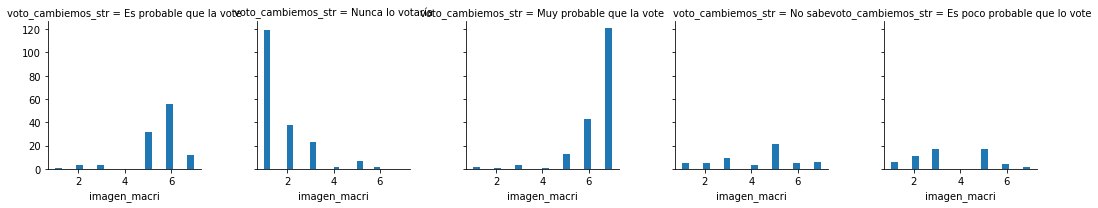

In [10]:
g = sns.FacetGrid(train_df, col='voto_cambiemos_str')
g.map(plt.hist, 'imagen_macri', bins=20)
plt.show()

In [11]:
train_df[['voto_cambiemos_str', 'imagen_vidal']].groupby(['voto_cambiemos_str'], as_index=False).mean().sort_values(by='imagen_vidal', ascending=False)

,voto_cambiemos_str,imagen_vidal
2,Muy probable que la vote,6.701087
1,Es probable que la vote,6.355140
3,No sabe,5.000000
0,Es poco probable que lo vote,4.771930
4,Nunca lo votaría,2.277487


Chequeo correlaciones de parametros con el voto a macri

In [12]:
train_df[['voto_cambiemos_str', 'voto_cfk']].groupby(['voto_cambiemos_str'], as_index=False).mean().sort_values(by='voto_cfk', ascending=False)

,voto_cambiemos_str,voto_cfk
4,Nunca lo votaría,3.848168
0,Es poco probable que lo vote,2.175439
3,No sabe,1.907407
1,Es probable que la vote,1.392523
2,Muy probable que la vote,1.239130


In [13]:
train_df[['voto_cambiemos_str', 'economia_pais']].groupby(['voto_cambiemos_str'], as_index=False).mean().sort_values(by='economia_pais', ascending=False)

,voto_cambiemos_str,economia_pais
2,Muy probable que la vote,5.103261
1,Es probable que la vote,4.373832
3,No sabe,3.351852
0,Es poco probable que lo vote,2.719298
4,Nunca lo votaría,1.727749


In [14]:
train_df[['voto_cambiemos_str', 'emocion_pais']].groupby(['voto_cambiemos_str'], as_index=False).mean().sort_values(by='emocion_pais', ascending=False)

,voto_cambiemos_str,emocion_pais
2,Muy probable que la vote,3.494565
1,Es probable que la vote,2.495327
3,No sabe,1.592593
4,Nunca lo votaría,1.094241
0,Es poco probable que lo vote,0.771930


In [15]:
train_df[['voto_cambiemos_str', 'Edad']].groupby(['voto_cambiemos_str'], as_index=False).mean().sort_values(by='Edad', ascending=False)

,voto_cambiemos_str,Edad
2,Muy probable que la vote,3.369565
3,No sabe,3.222222
1,Es probable que la vote,3.168224
0,Es poco probable que lo vote,3.000000
4,Nunca lo votaría,2.748691


In [16]:
train_df[['voto_cambiemos_str', 'Genero']].groupby(['voto_cambiemos_str'], as_index=False).mean().sort_values(by='Genero', ascending=False)

,voto_cambiemos_str,Genero
2,Muy probable que la vote,0.532609
0,Es poco probable que lo vote,0.526316
4,Nunca lo votaría,0.523560
3,No sabe,0.481481
1,Es probable que la vote,0.476636


In [17]:
train_df[['voto_cambiemos_str', 'principal_problematica_actualidad']].groupby(['voto_cambiemos_str'], as_index=False).mean().sort_values(by='principal_problematica_actualidad', ascending=False)

,voto_cambiemos_str,principal_problematica_actualidad
0,Es poco probable que lo vote,1.789474
2,Muy probable que la vote,1.592391
1,Es probable que la vote,1.485981
3,No sabe,1.407407
4,Nunca lo votaría,1.303665


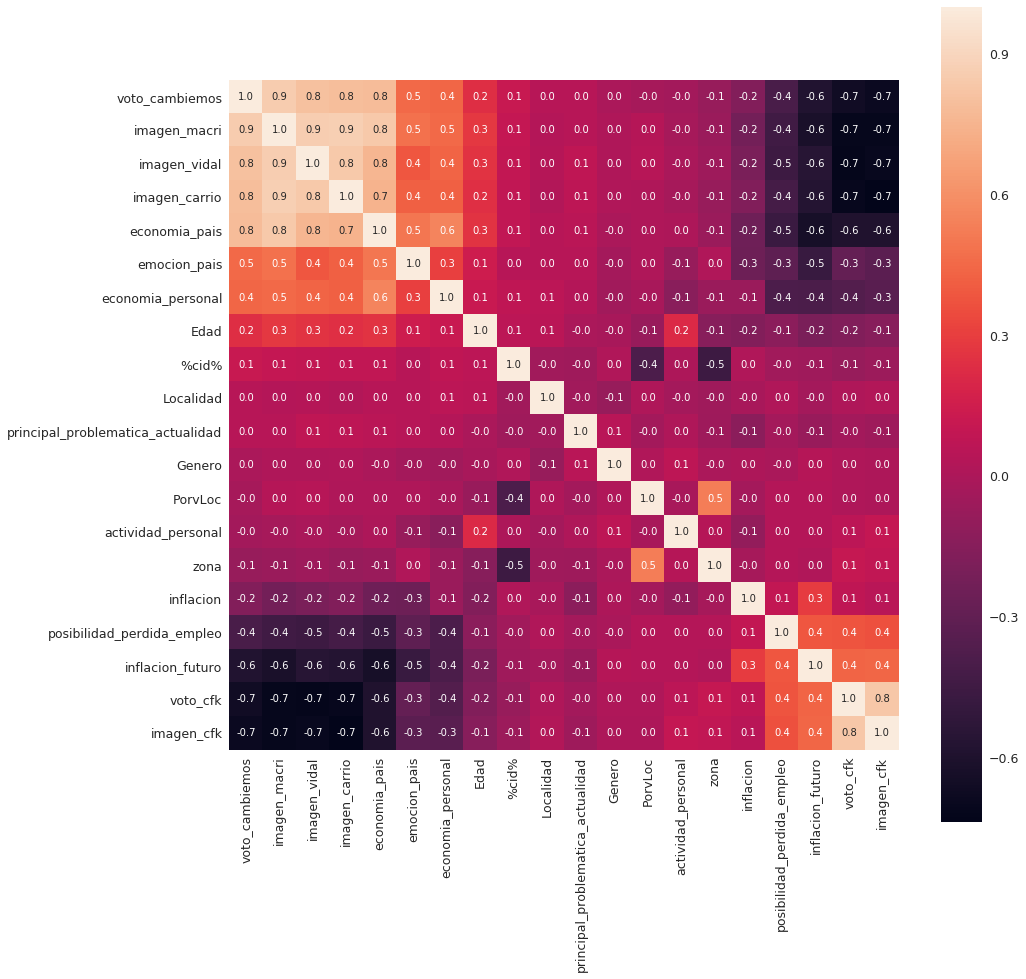

In [18]:
corrmat = train_df.corr()
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'voto_cambiemos')['voto_cambiemos'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(15,15))  
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.1f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

## Selección de features

Voy a dividir el data set en 2, uno con campos mas obvios o correlacionados y otro sin ellos, para hacerlo mas desafiante.<br>
Teniendo en cuenta estos campos, probé la performance humana. Tome 20 casos al azar y le pedí a gente politólogos que me digan en cada caso si vota, no vota o no sabe a cambiemos.<br>
<br>
El accuracy humano (medido mediante F1) en el caso obvio es de: <b> 0.51 </b><br>
El accuracy humano (medido mediante F1) en el caso menos obvio es de: <b> 0.44 </b>


In [54]:
df_filtered = train_df.filter(items=['principal_problematica_actualidad', 
                                     'emocion_pais',
                                     'economia_pais',
                                     'economia_personal',
                                     'inflacion',
                                     'actividad_personal',
                                     'posibilidad_perdida_empleo',
                                     'Edad',
                                     'inflacion_futuro',
                                     'voto_cambiemos'])
df_more_filtered = train_df.filter(items=['principal_problematica_actualidad', 
                                     'emocion_pais',
                                     'economia_pais',
                                     'economia_personal',
                                     'inflacion',                                     
                                     'inflacion_futuro',
                                     'voto_cambiemos'])

df_obvio = train_df.filter(items=['imagen_macri',
                                  'economia_pais',
                                  'emocion_pais',
                                  'economia_personal',
                                  'voto_cambiemos',
                                     'imagen_cfk',
                                  'imagen_vidal',
                                  ])


## Entrenamientos

### Naive Bayes, RandomFores, Regresion Logistica, KNN, SVM

Selecciono las columnas mas correlacionadas

Clasifico con los algoritmos comunes

In [25]:
from sklearn.model_selection import train_test_split
def clasificadores(X,y):
    X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X, y)

    acc_knn = round(knn.score(X_test, y_test) * 100, 2)


    random_forest = RandomForestClassifier(n_estimators=100)
    random_forest.fit(X, y)

    acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)


    gaussian = GaussianNB()
    gaussian.fit(X, y)

    acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)


    logreg = LogisticRegression()
    logreg.fit(X, y)

    acc_log = round(logreg.score(X_test, y_test) * 100, 2)


    svc = SVC()
    svc.fit(X, y)

    acc_svc = round(svc.score(X_test, y_test) * 100, 2)


    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X, y)

    acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
    return [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_decision_tree]



In [56]:
X = df_obvio.drop("voto_cambiemos", axis=1)
y = df_obvio.filter(items=["voto_cambiemos"])
obvio = clasificadores(X,y)

X = df_filtered.drop("voto_cambiemos", axis=1)
y = df_filtered.filter(items=["voto_cambiemos"])
filtered = clasificadores(X,y)

X = df_more_filtered.drop("voto_cambiemos", axis=1)
y = df_more_filtered.filter(items=["voto_cambiemos"])
more_filtered = clasificadores(X,y)


models = pd.DataFrame({
    'Clasificador': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Obvio': obvio,
    'Filtrado': filtered,
    'Mas Filtrado': more_filtered})
models[['Clasificador','Obvio','Filtrado','Mas Filtrado']].sort_values(by='Obvio', ascending=False)

/home/juanma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/home/juanma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


,Clasificador,Obvio,Filtrado,Mas Filtrado
0,Support Vector Machines,65.58,59.74,61.69
3,Random Forest,65.58,59.74,57.14
5,Decision Tree,64.29,50.65,53.25
1,KNN,62.99,57.14,56.49
4,Naive Bayes,62.99,59.74,61.69
2,Logistic Regression,61.04,60.39,59.74


### REDES NEURONALES

In [40]:
%load_ext autoreload
%autoreload 2
from IPython.display import HTML
import reg_helper as RHelper
import numpy as np
import draw_nn
from matplotlib import pyplot as plt 
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras import initializers
from fnn_helper import PlotLosses
from keras import optimizers

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
X = df_filtered.drop("voto_cambiemos", axis=1)
y = df_filtered.filter(items=["voto_cambiemos"])
from sklearn.model_selection import train_test_split
#train_df.voto_cambiemos_reducido.unique()
X.shape

(769, 9)

In [58]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
X_train, X_test, y_train, y_test= train_test_split(X, dummy_y, test_size=0.2, random_state=42)

In [102]:

epochs = 300 #adam 3000, sgd 30000
lr=0.01
decay=0
input_shape = 9
hidden_units = 200 # Probar con 3, 10, 20, 200
output_size = 5
#optim = optimizers.sgd(lr=lr, decay=decay, momentum=0) # cambiar a momentum 0.9 y lr a 5
batch_size = 512# 10 y 59
p = 0.4
optim = optimizers.adam(lr=lr, decay=0.1)
#optim = optimizers.rmsprop(lr=lr, decay=0.001)

default_initializer = 'normal'
# Creo el modelo
model_single_layer = Sequential()

model_single_layer.add(Dense(hidden_units, input_dim=input_shape, init='RandomUniform',activation="sigmoid"))
model_single_layer.add(Dropout(p))
model_single_layer.add(BatchNormalization())
model_single_layer.add(Dense(hidden_units, kernel_initializer=default_initializer,bias_initializer=default_initializer, name='Hidden',activation="sigmoid"))
model_single_layer.add(Dropout(p))
model_single_layer.add(BatchNormalization())
model_single_layer.add(Dense(hidden_units, kernel_initializer=default_initializer,bias_initializer=default_initializer, name='Hidden_2',activation="sigmoid"))
model_single_layer.add(Dropout(p))
model_single_layer.add(BatchNormalization())
model_single_layer.add(Dense(hidden_units, kernel_initializer=default_initializer,bias_initializer=default_initializer, name='Hidden_3',activation="sigmoid"))
model_single_layer.add(Dropout(p))
model_single_layer.add(BatchNormalization())
model_single_layer.add(Dense(hidden_units, kernel_initializer=default_initializer,bias_initializer=default_initializer, name='Hidden_4',activation="sigmoid"))
model_single_layer.add(Dropout(p))
model_single_layer.add(BatchNormalization())
model_single_layer.add(Dense(output_size, kernel_initializer=default_initializer, name='Salida'))
model_single_layer.add(Activation('softmax'))
model_single_layer.summary()

/home/juanma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, activation="sigmoid", kernel_initializer="RandomUniform", input_dim=9)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 200)               2000      
_________________________________________________________________
dropout_67 (Dropout)         (None, 200)               0         
_________________________________________________________________
batch_normalization_67 (Batc (None, 200)               800       
_________________________________________________________________
Hidden (Dense)               (None, 200)               40200     
_________________________________________________________________
dropout_68 (Dropout)         (None, 200)               0         
_________________________________________________________________
batch_normalization_68 (Batc (None, 200)               800       
_________________________________________________________________
Hidden_2 (Dense)             (None, 200)               40200     
__________

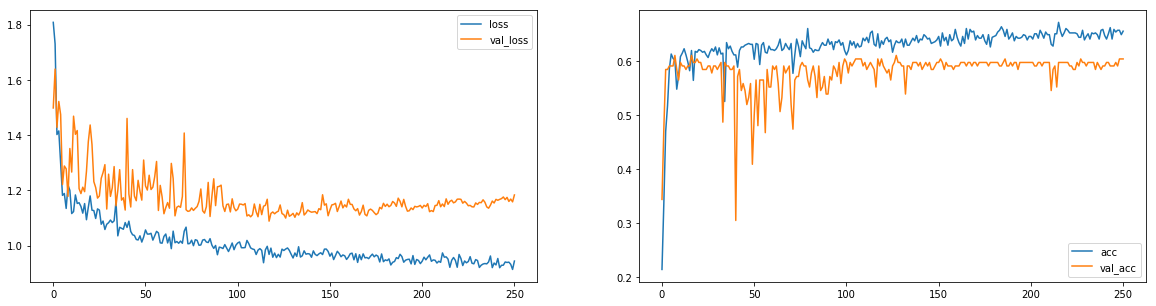

In [103]:

#optim = optimizers.adam(lr=lr, decay=0.01)
optim = optimizers.rmsprop(lr=lr, decay=0.01)
model_single_layer.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
plot_losses = PlotLosses(plot_interval=50, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
checkpointer = ModelCheckpoint(filepath='model_enero_marzo.hdf5', verbose=0, save_best_only=True)
model_single_layer.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses, checkpointer],
         )

In [104]:
model_single_layer.load_weights('model_enero_marzo.hdf5')
loss, acc = model_single_layer.evaluate(X_test, y_test)

154/154 [==============================] - 0s 89us/step


In [105]:
print(acc)

0.6038961077665354


## Reduzco la cantidad de clases a predecir para simplificar

In [108]:
voto_cambiemos_mapping = {'Nunca lo votaría':1, 'Es poco probable que lo vote':1, 'No sabe':2,
                         'Es probable que la vote':3,'Muy probable que la vote':3}

train_df['voto_cambiemos_reducido'] = train_df['voto_cambiemos_str'].map(voto_cambiemos_mapping)
train_df['voto_cambiemos_reducido'] = train_df['voto_cambiemos_reducido'].fillna(0).astype(int)
train_df = train_df.drop(train_df.loc[train_df['voto_cambiemos_reducido'] == 0].index)

df_filtered['voto_cambiemos_reducido'] = train_df['voto_cambiemos_reducido']
df_more_filtered['voto_cambiemos_reducido'] = train_df['voto_cambiemos_reducido']
df_obvio['voto_cambiemos_reducido'] = train_df['voto_cambiemos_reducido']




df_filtered = df_filtered.drop(['voto_cambiemos'], axis=1)
df_more_filtered = df_more_filtered.drop(['voto_cambiemos'], axis=1)
df_obvio = df_obvio.drop(['voto_cambiemos'], axis=1)



ValueError: labels ['voto_cambiemos'] not contained in axis

In [110]:
X = df_obvio.drop("voto_cambiemos_reducido", axis=1)
y = df_obvio.filter(items=["voto_cambiemos_reducido"])
obvio = clasificadores(X,y)

X = df_filtered.drop("voto_cambiemos_reducido", axis=1)
y = df_filtered.filter(items=["voto_cambiemos_reducido"])
filtered = clasificadores(X,y)

X = df_more_filtered.drop("voto_cambiemos_reducido", axis=1)
y = df_more_filtered.filter(items=["voto_cambiemos_reducido"])
more_filtered = clasificadores(X,y)



models = pd.DataFrame({
    'Clasificador': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Obvio': obvio,
    'Filtrado': filtered,
    'Mas Filtrado': more_filtered})
models[['Clasificador','Obvio','Filtrado','Mas Filtrado']].sort_values(by='Obvio', ascending=False)

/home/juanma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/home/juanma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


,Clasificador,Obvio,Filtrado,Mas Filtrado
3,Random Forest,85.71,79.22,79.22
1,KNN,85.06,76.62,79.87
0,Support Vector Machines,84.42,78.57,78.57
2,Logistic Regression,84.42,79.87,79.87
4,Naive Bayes,83.77,78.57,77.92
5,Decision Tree,83.12,69.48,72.08


### Red neuronal 3 clases vota, no vota, no sabe

In [204]:
X = df_filtered.drop("voto_cambiemos_reducido", axis=1)
y = df_filtered.filter(items=["voto_cambiemos_reducido"])
from sklearn.model_selection import train_test_split
#train_df.voto_cambiemos_reducido.unique()
np.unique(y)

array([1, 2, 3])

In [183]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
X_train, X_test, y_train, y_test= train_test_split(X, dummy_y, test_size=0.2, random_state=42)
X_train.shape

(615, 9)

In [205]:
y_test[150]

array([0., 0., 1.])

In [191]:
epochs = 300 #adam 3000, sgd 30000
lr=0.02
decay=0
input_shape = 9
hidden_units = 100 # Probar con 3, 10, 20, 200
output_size = 3
p = 0.3
batch_size = 1024 # 10 y 59

optim = optimizers.adam(lr=lr, decay=0.1)
#optim = optimizers.rmsprop(lr=lr, decay=0.001)

default_initializer = 'normal'
# Creo el modelo
model_3_clases = Sequential()
model_3_clases.add(Dense(hidden_units, input_dim=input_shape, init='RandomUniform',activation="relu"))
model_3_clases.add(BatchNormalization())
model_3_clases.add(Dropout(p))
model_3_clases.add(Dense(hidden_units, kernel_initializer=default_initializer,bias_initializer=default_initializer, name='Hidden',activation="relu"))
model_3_clases.add(BatchNormalization())
model_3_clases.add(Dropout(p))
model_3_clases.add(Dense(hidden_units, kernel_initializer=default_initializer,bias_initializer=default_initializer, name='Hidden_3',activation="relu"))
model_3_clases.add(BatchNormalization())
model_3_clases.add(Dropout(p))
model_3_clases.add(Dense(hidden_units, kernel_initializer=default_initializer,bias_initializer=default_initializer, name='Hidden_2',activation="relu"))
model_3_clases.add(BatchNormalization())
model_3_clases.add(Dropout(p))
model_3_clases.add(Dense(hidden_units, kernel_initializer=default_initializer,bias_initializer=default_initializer, name='Hidden_4',activation="relu"))
model_3_clases.add(BatchNormalization())
model_3_clases.add(Dropout(p))


model_3_clases.add(Dense(output_size, kernel_initializer=default_initializer, name='Salida'))
model_3_clases.add(Activation('softmax'))
model_3_clases.summary()

/home/juanma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_initializer="RandomUniform", input_dim=9)`
  app.launch_new_instance()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 100)               1000      
_________________________________________________________________
batch_normalization_112 (Bat (None, 100)               400       
_________________________________________________________________
dropout_112 (Dropout)        (None, 100)               0         
_________________________________________________________________
Hidden (Dense)               (None, 100)               10100     
_________________________________________________________________
batch_normalization_113 (Bat (None, 100)               400       
_________________________________________________________________
dropout_113 (Dropout)        (None, 100)               0         
_________________________________________________________________
Hidden_3 (Dense)             (None, 100)               10100     
__________

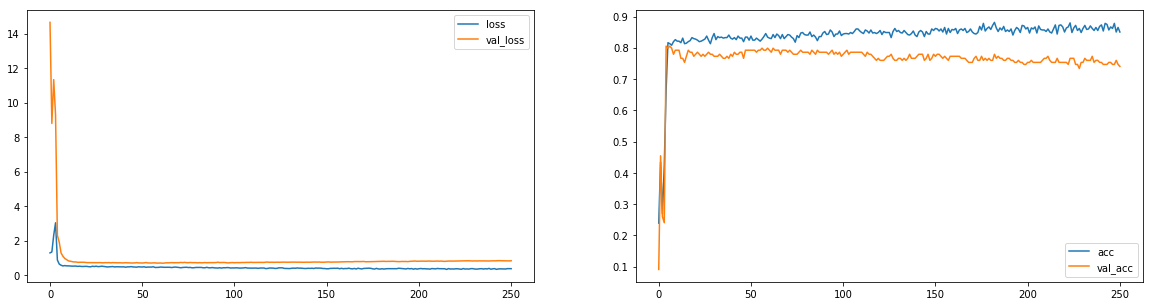

In [193]:
#sgd = SGD(lr=lr, decay=decay, momentum=0.9, nesterov=True)
#optim = optimizers.adam(lr=lr, decay=0.1)
optim = optimizers.rmsprop(lr=lr, decay=0.1)
model_3_clases.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
plot_losses = PlotLosses(plot_interval=50, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
checkpointer = ModelCheckpoint(filepath='model_3_clases.hdf5', verbose=0, save_best_only=True)
model_3_clases.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses, checkpointer],
         )

In [194]:
model_3_clases.load_weights('model_enero_marzo.hdf5')
loss, acc = model_3_clases.evaluate(X_test, y_test)

154/154 [==============================] - 0s 72us/step


In [195]:
print(acc)

0.7857142833920269


In [200]:
test_filtered = test_df.filter(items=['principal_problematica_actualidad', 
                                     'emocion_pais',
                                     'economia_pais',
                                     'economia_personal',
                                     'inflacion',
                                     'actividad_personal',
                                     'posibilidad_perdida_empleo',
                                     'Edad',
                                     'inflacion_futuro','voto_cambiemos_str'])
voto_cambiemos_mapping = {'Nunca lo votaría':1, 'Es poco probable que lo vote':1, 'No sabe':2,
                         'Es probable que la vote':3,'Muy probable que la vote':3}

test_filtered['voto_cambiemos_reducido'] = test_filtered['voto_cambiemos_str'].map(voto_cambiemos_mapping)
test_filtered['voto_cambiemos_reducido'] = test_filtered['voto_cambiemos_reducido'].fillna(0).astype(int)
test_filtered = test_filtered.drop(test_filtered.loc[test_filtered['voto_cambiemos_reducido'] == 0].index)


test_filtered = test_filtered.drop("voto_cambiemos_str", axis=1).copy()
test_filtered_sub  =test_filtered.sample(n=20)
test_filtered_sub  =test_filtered
X_test_2  = test_filtered_sub.drop("voto_cambiemos_reducido", axis=1).copy()
y_test_2 = test_filtered_sub.filter(items=["voto_cambiemos_reducido"])
test_prediction = model_3_clases.predict(X_test_2)
test_labels = np.argmax(test_prediction, axis = -1)
#test_labels = test_prediction.argmax(axis=-1)

In [199]:
np.unique(y_test_2)

array([1, 2, 3])

In [202]:
np.unique(test_labels)


array([0, 2])

In [130]:
from sklearn.metrics import roc_auc_score,roc_curve, auc,accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from scipy import interp
from itertools import cycle



print('recall: ',recall_score(y_test_2['voto_cambiemos_reducido'], test_labels, average="macro"))
print('precision_score: ',precision_score(y_test_2['voto_cambiemos_reducido'], test_labels, average="macro"))
print('F1: ',f1_score(y_test_2['voto_cambiemos_reducido'], test_labels, average="macro"))

('recall: ', 0.08333333333333333)
('precision_score: ', 0.016544117647058824)
('F1: ', 0.027607361963190184)


/home/juanma/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/juanma/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/juanma/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/juanma/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Predicción con dos clases vota, no vota

In [138]:
df_dos_clases = df_filtered.drop(df_filtered.loc[train_df['voto_cambiemos_reducido'] == 2].index)
df_dos_clases_obvio = df_obvio.drop(df_filtered.loc[train_df['voto_cambiemos_reducido'] == 2].index)

In [139]:
X = df_dos_clases.drop("voto_cambiemos_reducido", axis=1)
y = df_dos_clases.filter(items=["voto_cambiemos_reducido"])
dos_clases_filtrado = clasificadores(X,y)

X = df_dos_clases_obvio.drop("voto_cambiemos_reducido", axis=1)
y = df_dos_clases_obvio.filter(items=["voto_cambiemos_reducido"])
dos_clases_obvio = clasificadores(X,y)

models = pd.DataFrame({
    'Clasificador': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Dos clases filtrado': dos_clases_filtrado,
    'Dos clases obvio': dos_clases_obvio})
models[['Clasificador','Dos clases obvio','Dos clases filtrado']].sort_values(by='Dos clases obvio', ascending=False)

/home/juanma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/home/juanma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


,Clasificador,Dos clases obvio,Dos clases filtrado
3,Random Forest,93.06,84.72
2,Logistic Regression,91.67,82.64
0,Support Vector Machines,90.97,84.72
1,KNN,90.28,84.03
5,Decision Tree,89.58,79.17
4,Naive Bayes,88.89,84.03


### Red neuronal

In [140]:
X = df_dos_clases.drop("voto_cambiemos_reducido", axis=1)
y = df_dos_clases.filter(items=["voto_cambiemos_reducido"])
from sklearn.model_selection import train_test_split
#train_df.voto_cambiemos_reducido.unique()
X.shape

(716, 9)

In [141]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
X_train, X_test, y_train, y_test= train_test_split(X, dummy_y, test_size=0.2, random_state=42)
X_train.shape

(572, 9)

In [142]:
epochs = 500 #adam 3000, sgd 30000
lr=0.02
decay=0
input_shape = 9
hidden_units = 80 # Probar con 3, 10, 20, 200
output_size = 2
p = 0.2
batch_size = 1024 # 10 y 59

optim = optimizers.adam(lr=lr, decay=0.1)
#optim = optimizers.rmsprop(lr=lr, decay=0.001)

default_initializer = 'normal'
# Creo el modelo
model_single_layer = Sequential()
model_single_layer.add(Dense(hidden_units, input_dim=input_shape, init='RandomUniform',activation="relu"))
model_single_layer.add(BatchNormalization())
model_single_layer.add(Dropout(p))
model_single_layer.add(Dense(hidden_units, kernel_initializer=default_initializer,bias_initializer=default_initializer, name='Hidden',activation="relu"))
model_single_layer.add(BatchNormalization())
model_single_layer.add(Dropout(p))
model_single_layer.add(Dense(hidden_units, kernel_initializer=default_initializer,bias_initializer=default_initializer, name='Hidden_3',activation="relu"))
model_single_layer.add(BatchNormalization())
model_single_layer.add(Dropout(p))
model_single_layer.add(Dense(hidden_units, kernel_initializer=default_initializer,bias_initializer=default_initializer, name='Hidden_2',activation="relu"))
model_single_layer.add(BatchNormalization())
model_single_layer.add(Dropout(p))
model_single_layer.add(Dense(hidden_units, kernel_initializer=default_initializer,bias_initializer=default_initializer, name='Hidden_4',activation="relu"))
model_single_layer.add(BatchNormalization())
model_single_layer.add(Dropout(p))


model_single_layer.add(Dense(output_size, kernel_initializer=default_initializer, name='Salida'))
model_single_layer.add(Activation('softmax'))
model_single_layer.summary()

/home/juanma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(80, activation="relu", kernel_initializer="RandomUniform", input_dim=9)`
  app.launch_new_instance()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 80)                800       
_________________________________________________________________
batch_normalization_97 (Batc (None, 80)                320       
_________________________________________________________________
dropout_97 (Dropout)         (None, 80)                0         
_________________________________________________________________
Hidden (Dense)               (None, 80)                6480      
_________________________________________________________________
batch_normalization_98 (Batc (None, 80)                320       
_________________________________________________________________
dropout_98 (Dropout)         (None, 80)                0         
_________________________________________________________________
Hidden_3 (Dense)             (None, 80)                6480      
__________

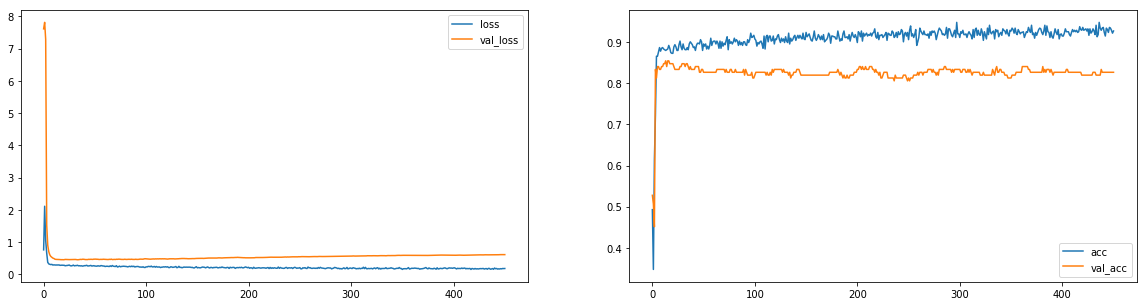

In [143]:
#sgd = SGD(lr=lr, decay=decay, momentum=0.9, nesterov=True)
#optim = optimizers.adam(lr=lr, decay=0.1)
optim = optimizers.rmsprop(lr=lr, decay=0.3)
model_single_layer.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
plot_losses = PlotLosses(plot_interval=50, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
checkpointer = ModelCheckpoint(filepath='model_dos_clases.hdf5', verbose=0, save_best_only=True)
model_single_layer.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses, checkpointer],
         )

In [144]:
model_single_layer.load_weights('model_dos_clases.hdf5')
loss, acc = model_single_layer.evaluate(X_test, y_test)

144/144 [==============================] - 0s 77us/step


In [145]:
print(acc)

0.8472222222222222


In [160]:
test_filtered = test_df.filter(items=['principal_problematica_actualidad', 
                                     'emocion_pais',
                                     'economia_pais',
                                     'economia_personal',
                                     'inflacion',
                                     'actividad_personal',
                                     'posibilidad_perdida_empleo',
                                     'Edad',
                                     'inflacion_futuro','voto_cambiemos_str'])
voto_cambiemos_mapping = {'Nunca lo votaría':0, 'Es poco probable que lo vote':0, 'No sabe':2,
                         'Es probable que la vote':1,'Muy probable que la vote':1}

test_filtered['voto_cambiemos_reducido'] = test_filtered['voto_cambiemos_str'].map(voto_cambiemos_mapping)
test_filtered = test_filtered.drop("voto_cambiemos_str", axis=1).copy()


test_filtered = test_filtered.drop(test_filtered.loc[test_filtered['voto_cambiemos_reducido'] == 2].index)
test_filtered['voto_cambiemos_reducido'] = test_filtered['voto_cambiemos_reducido'].fillna(3).astype(int)
test_filtered = test_filtered.drop(test_filtered.loc[test_filtered['voto_cambiemos_reducido'] == 3].index)

test_filtered_sub  =test_filtered.sample(n=80)

X_test_2  = test_filtered_sub.drop("voto_cambiemos_reducido", axis=1).copy()
y_test_2 = test_filtered_sub.filter(items=["voto_cambiemos_reducido"])
test_prediction = model_single_layer.predict(X_test_2)
test_labels = np.argmax(test_prediction, axis = 1)

In [161]:
from sklearn.metrics import roc_auc_score,roc_curve, auc,accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from scipy import interp
from itertools import cycle



print('recall: ',recall_score(y_test_2['voto_cambiemos_reducido'], test_labels, average="macro"))
print('precision_score: ',precision_score(y_test_2['voto_cambiemos_reducido'], test_labels, average="macro"))
print('F1: ',f1_score(y_test_2['voto_cambiemos_reducido'], test_labels, average="macro"))

('recall: ', 0.8859208045254556)
('precision_score: ', 0.8876262626262625)
('F1: ', 0.8866320264525271)
